In [559]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json

In [560]:
label='milestone-experiments'
keywords='benchmark_testing'
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs682research')
select_query = "SELECT optimizer, activation, architecture, test_loss, test_accuracy, test_mae, test_mse  \
FROM research_exploration WHERE label='{}' and keywords='{}'".format(label, keywords)
dataDf = pd.read_sql(select_query, con=db_conn)
dataDf.head()

,optimizer,activation,architecture,test_loss,test_accuracy,test_mae,test_mse
0,Adam,relu,AlexNet,"{('Adam', 'relu'): 1.1646414756774903}","{('Adam', 'relu'): 0.7025}","{('Adam', 'relu'): 0.06554586}","{('Adam', 'relu'): 0.04532851}"
1,Adam,relu,LeNet5,"{('Adam', 'relu'): 1.1451542377471924}","{('Adam', 'relu'): 0.108125}","{('Adam', 'relu'): 0.17960995}","{('Adam', 'relu'): 0.10790199}"
2,Adam,relu,MiniVGGNet,"{('Adam', 'tanh'): 1.026837028980255, ('Adam',...","{('Adam', 'tanh'): 0.65125, ('Adam', 'relu'): ...","{('Adam', 'tanh'): 0.0835045, ('Adam', 'relu')...","{('Adam', 'tanh'): 0.047035422, ('Adam', 'relu..."
3,Adam,relu,ZFNet,"{('RAdam', 'tanh'): 1.1140955352783204, ('RAda...","{('RAdam', 'tanh'): 0.60975, ('RAdam', 'relu')...","{('RAdam', 'tanh'): 0.09913574, ('RAdam', 'rel...","{('RAdam', 'tanh'): 0.051664423, ('RAdam', 're..."
4,Adam,tanh,AlexNet,"{('Adam', 'tanh'): 1.5200986404418946}","{('Adam', 'tanh'): 0.71675}","{('Adam', 'tanh'): 0.06026097}","{('Adam', 'tanh'): 0.047331467}"


In [561]:
def autolabel(rects, label_txt):
    """
    Attach a text label above each bar displaying its height
    """
    i_ = 0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, round(label_txt[i_], 3), ha='center', va='bottom')
        i_ += 1

In [562]:
def fix_dict_data(str_text):
    if str_text[-1] != '}':
        str_text += '}'
    return str_text
cols = ['optimizer', 'activation', 'architecture', 'test_loss', 'test_accuracy', 'test_mae', 'test_mse']
filteredDf = pd.DataFrame(columns=cols)
for itr in range(len(dataDf)):
    row = dataDf.iloc[itr]
    optimizer, activation, architecture = row.optimizer, row.activation, row.architecture
    test_loss = eval(fix_dict_data(row.test_loss)).get((optimizer, activation))
    test_accuracy = eval(row.test_accuracy).get((optimizer, activation))
    test_mae = eval(row.test_mae).get((optimizer, activation))
    test_mse = eval(row.test_mse).get((optimizer, activation))
    new_row = {'optimizer': optimizer, 'activation': activation, 'architecture':architecture, 'test_loss': test_loss, 
               'test_accuracy': test_accuracy, 'test_mae': test_mae, 'test_mse': test_mse}
    tempDf = pd.DataFrame(new_row, index=[itr])
    filteredDf = filteredDf.append(tempDf)
    

<Figure size 720x720 with 0 Axes>

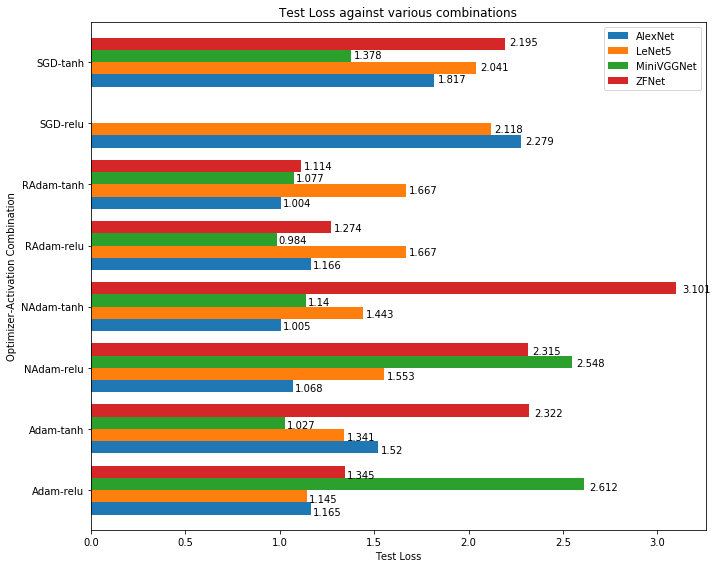

In [563]:
# Test Loss
filteredDf['opt_act'] = filteredDf['optimizer'] + '-' + filteredDf['activation']
plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(filteredDf, index='opt_act', columns='architecture', values='test_loss')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Test Loss')
ax.set_title('Test Loss against various combinations')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))
    
plt.savefig('saved_plots/milestone_test_loss.png')

<Figure size 720x720 with 0 Axes>

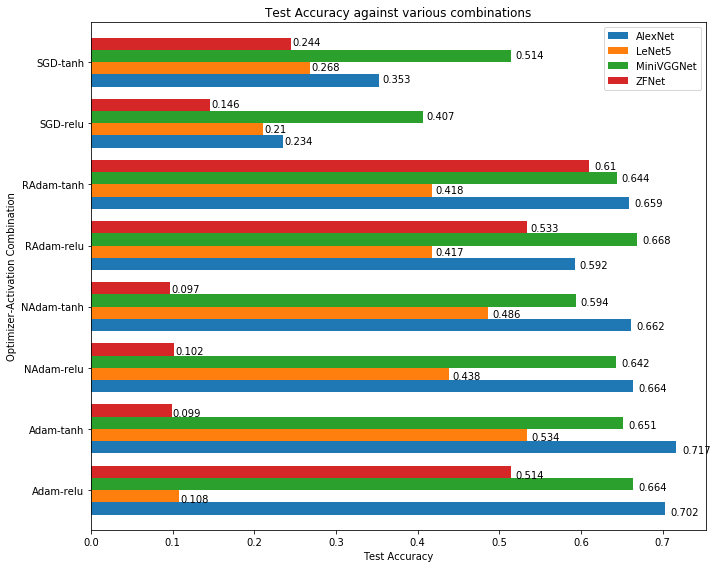

In [564]:
#Accuracy
filteredDf['opt_act'] = filteredDf['optimizer'] + '-' + filteredDf['activation']
plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(filteredDf, index='opt_act', columns='architecture', values='test_accuracy')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Test Accuracy')
ax.set_title('Test Accuracy against various combinations')
plt.tight_layout()
for p in ax.patches:
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))
plt.savefig('saved_plots/milestone_test_accuracy.png')

<Figure size 720x720 with 0 Axes>

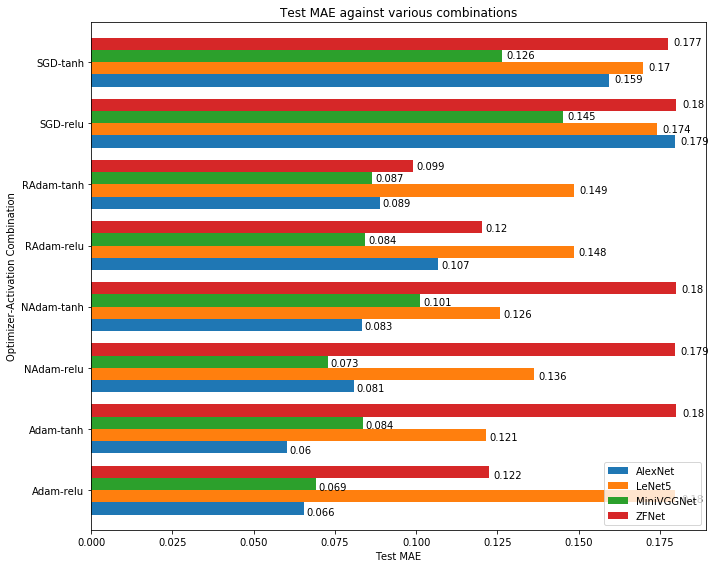

In [565]:
#MAE
filteredDf['opt_act'] = filteredDf['optimizer'] + '-' + filteredDf['activation']
plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(filteredDf, index='opt_act', columns='architecture', values='test_mae')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Test MAE')
ax.set_title('Test MAE against various combinations')
plt.tight_layout()
for p in ax.patches:
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))
    
plt.savefig('saved_plots/milestone_test_mae.png')

<Figure size 720x720 with 0 Axes>

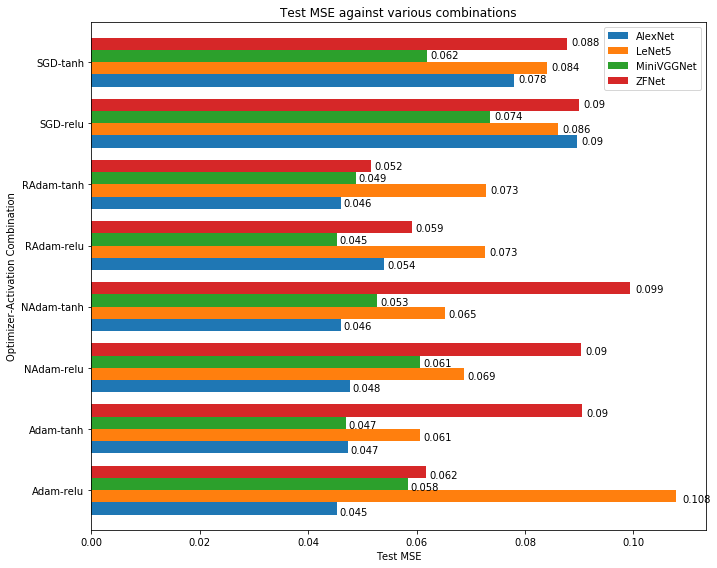

In [566]:
#MSE
filteredDf['opt_act'] = filteredDf['optimizer'] + '-' + filteredDf['activation']
plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(filteredDf, index='opt_act', columns='architecture', values='test_mse')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Test MSE')
ax.set_title('Test MSE against various combinations')
plt.tight_layout()
for p in ax.patches:
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))
    
plt.savefig('saved_plots/milestone_test_mse.png')

In [567]:
def fix_dict_data(str_text):
    if str_text[-1] != '}':
        str_text += ']}'
    return str_text

label='milestone-experiments'
keywords='benchmark_testing'
select_query = "SELECT optimizer, activation, architecture, training_loss FROM research_exploration \
WHERE label='{}' and keywords='{}'".format(label, keywords)
dataDf = pd.read_sql(select_query, con=db_conn)
cols = ['optimizer', 'activation', 'architecture', 'epochs', 'training_loss']
filteredDf = pd.DataFrame(columns=cols)
i_ = 0
for itr in range(len(dataDf)):
    row = dataDf.iloc[itr]
    optimizer, activation, architecture = row.optimizer, row.activation, row.architecture
    training_loss = eval(fix_dict_data(row.training_loss)).get((optimizer, activation))
    if training_loss is None: 
        continue
    for epoch in range(25):
        if epoch >= len(training_loss):
            new_row = {'optimizer': optimizer, 'activation': activation, 'architecture':architecture, 'epochs': epoch, 'training_loss': training_loss[len(training_loss)-1]}
        else:
            new_row = {'optimizer': optimizer, 'activation': activation, 'architecture':architecture, 'epochs': epoch, 'training_loss': training_loss[epoch]}
        tempDf = pd.DataFrame(new_row, index=[i_])
        i_ += 1
        filteredDf = filteredDf.append(tempDf)

<Figure size 720x720 with 0 Axes>

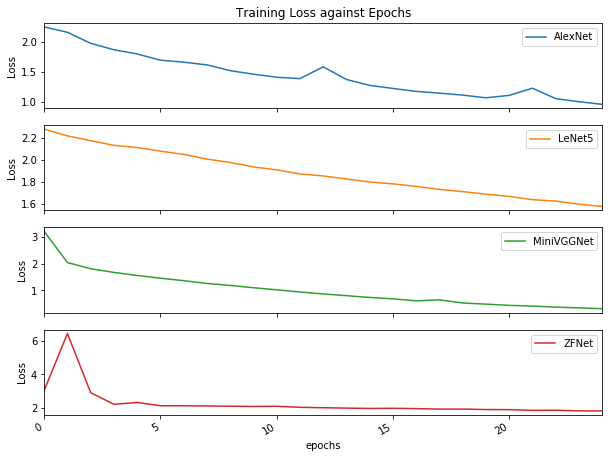

In [568]:
plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(filteredDf, index='epochs', columns='architecture', values='training_loss')
plt.show()

ax = pivot_view.plot(training_loss, kind='line', figsize=(10, 8), subplots=True)
ax[0].set_title('Training Loss against Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Loss')
ax[2].set_ylabel('Loss')
ax[3].set_ylabel('Loss')

plt.savefig('saved_plots/milestone_train_loss_epoch.png')